<div style="background-color:#e6f2ff; padding:15px; border-radius:8px;">
  <h1>💰 Electoral Financing — Analysis of Political Party Spending in Colombia (2010–2022)</h1>
  <p>This notebook examines the evolution of <strong>electoral financing in Colombia</strong> between 2010 and 2022, using official datasets published by 
  <a href="https://www.datoselectorales.org/">datoselectorales.org</a> and complementary public sources. 
  The platform collects, systematizes, and disseminates electoral information, ensuring transparency and accessibility for researchers, institutions, and citizens.</p>

  <h2>📁 Dataset Overview</h2>
  <p>We use the <strong>Electoral Financing Dataset (2010–2022)</strong>, which provides detailed information on reported incomes and expenses by candidates and political parties across Colombia.</p>

  <h2>📌 Key Objectives</h2>
  <ul>
    <li>🔍 Identify spending patterns by political parties and coalitions across different elections.</li>
    <li>🌎 Highlight regional contrasts in campaign financing and resource allocation.</li>
    <li>📈 Analyze long-term trends in electoral financing and their impact on democratic competition.</li>
  </ul>

  <blockquote>This analysis aims to uncover financial dynamics behind electoral processes, contributing to a deeper understanding of transparency and equity in Colombian democracy.</blockquote>
</div>

<div style="background-color:#e6ffe6; padding:15px; border-radius:8px;">
  <h1>💰 Financiación Electoral — Análisis del Gasto de Partidos Políticos en Colombia (2010–2022)</h1>
  <p>Este notebook examina la evolución de la <strong>financiación electoral en Colombia</strong> entre 2010 y 2022, utilizando datasets oficiales publicados por 
  <a href="https://www.datoselectorales.org/">datoselectorales.org</a> y fuentes públicas complementarias. 
  Esta plataforma recopila, sistematiza y difunde información electoral, garantizando transparencia y accesibilidad para investigadores, instituciones y ciudadanía.</p>

  <h2>📁 Conjunto de datos</h2>
  <p>Se utiliza el <strong>Dataset de Financiación Electoral (2010–2022)</strong>, que contiene información detallada sobre ingresos y gastos reportados por candidatos y partidos políticos en Colombia.</p>

  <h2>📌 Objetivos clave</h2>
  <ul>
    <li>🔍 Identificar patrones de gasto de partidos y coaliciones en diferentes elecciones.</li>
    <li>🌎 Resaltar contrastes regionales en la financiación de campañas y distribución de recursos.</li>
    <li>📈 Analizar tendencias históricas en la financiación electoral y su impacto en la competencia democrática.</li>
  </ul>

  <blockquote>Este análisis busca revelar las dinámicas financieras detrás de los procesos electorales, contribuyendo a una comprensión más profunda de la transparencia y la equidad en la democracia colombiana.</blockquote>
</div>

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>Importación de librerías / Library import</h2>
  
  <p>Se importan las librerías necesarias para el análisis y visualización de datos:  
  <code>pandas</code> para manipulación de datos,  
  <code>unicodedata</code> para normalización de texto,  
  <code>matplotlib</code> y <code>seaborn</code> para gráficos,  
  <code>matplotlib.ticker</code> y <code>matplotlib.patches</code> para personalización de ejes y leyendas,  
  y <code>IPython.display</code> para mostrar contenido enriquecido dentro del notebook.  
  <em>Objetivo:</em> Contar con las herramientas básicas para limpiar, analizar y presentar la información de manera visual y clara.</p>
  
  <p>The required libraries for data analysis and visualization are imported:  
  <code>pandas</code> for data manipulation,  
  <code>unicodedata</code> for text normalization,  
  <code>matplotlib</code> and <code>seaborn</code> for plotting,  
  <code>matplotlib.ticker</code> and <code>matplotlib.patches</code> for axis and legend customization,  
  and <code>IPython.display</code> for rendering rich content inside the notebook.  
  <em>Objective:</em> Provide the essential tools to clean, analyze, and visually present the dataset.</p>
</div>

In [1]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from IPython.display import display, Markdown, IFrame, HTML

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>Carga y limpieza inicial del dataset / Initial dataset loading and cleaning</h2>
  
  <p>Se carga el archivo <code>financiacion.csv</code> y se realiza una limpieza básica:  
  - Se eliminan columnas irrelevantes (<code>cla_nombre</code>, <code>loc_nombre</code>, <code>tpe_nombre</code>, <code>fecha_2</code>, <code>rcd___id</code>).  
  - Se define la función <code>limpiar_texto</code> para normalizar cadenas: convertir a minúsculas, eliminar acentos, reemplazar la letra ñ y dejar texto limpio.  
  - Se corrige el nombre de la columna <code>muncipio</code> a <code>municipio</code>.  
  - Se aplican transformaciones de limpieza a columnas clave como <code>eleccion</code>, <code>cnd_nombre</code>, <code>departamento</code>, <code>municipio</code>, <code>partido</code>, <code>nombre_candidato</code>, <code>genero</code>, <code>momento_reporte</code>, <code>origen_o_destino</code> y <code>tipo_organizacion</code>.  
  - Finalmente, se imprimen los valores únicos de las columnas principales para verificar la consistencia.  
  <em>Objetivo:</em> Garantizar que los datos estén normalizados y listos para análisis posteriores.</p>
  
  <p>The <code>financiacion.csv</code> file is loaded and basic cleaning is performed:  
  - Irrelevant columns are dropped (<code>cla_nombre</code>, <code>loc_nombre</code>, <code>tpe_nombre</code>, <code>fecha_2</code>, <code>rcd___id</code>).  
  - A <code>limpiar_texto</code> function is defined to normalize strings: convert to lowercase, remove accents, replace ñ, and ensure clean text.  
  - The column name <code>muncipio</code> is corrected to <code>municipio</code>.  
  - Cleaning transformations are applied to key columns such as <code>eleccion</code>, <code>cnd_nombre</code>, <code>departamento</code>, <code>municipio</code>, <code>partido</code>, <code>nombre_candidato</code>, <code>genero</code>, <code>momento_reporte</code>, <code>origen_o_destino</code>, and <code>tipo_organizacion</code>.  
  - Finally, unique values of main columns are printed to check consistency.  
  <em>Objective:</em> Ensure the dataset is normalized and ready for further analysis.</p>
</div>

In [2]:
ruta_dataset = "../data/raw/financiacion.csv"
dataset = pd.read_csv(ruta_dataset, low_memory=False)

print("Columnas originales: ", dataset.columns.tolist())
print(dataset.head(3))

Columnas originales:  ['ingresos_gastos', 'eleccion', 'cnd_nombre', 'cla_nombre', 'departamento', 'muncipio', 'loc_nombre', 'partido', 'nombre_candidato', 'genero', 'elegido', 'momento_reporte', 'origen_o_destino', 'tpe_nombre', 'ing_valor', 'fecha_2', 'tipo_organizacion', 'mes_annio', 'rcd___id']
  ingresos_gastos                       eleccion              cnd_nombre  \
0         INGRESO  CONGRESO DE LA REPÚBLICA 2022  Senado de la Republica   
1         INGRESO  CONGRESO DE LA REPÚBLICA 2022  Senado de la Republica   
2         INGRESO  CONGRESO DE LA REPÚBLICA 2022  Senado de la Republica   

           cla_nombre departamento muncipio loc_nombre  \
0  Nacional Ordinaria          NaN      NaN          -   
1  Nacional Ordinaria          NaN      NaN          -   
2  Nacional Ordinaria          NaN      NaN          -   

                                             partido  \
0                         PARTIDO LIBERAL COLOMBIANO   
1                         PARTIDO LIBERAL COLOMBIAN

In [3]:
dataset = dataset.drop(columns=["cla_nombre", "loc_nombre", "tpe_nombre",
                                "fecha_2", "rcd___id"])

In [4]:
def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.lower().strip()
    texto = "".join(c for c in unicodedata.normalize("NFD", texto)
                    if unicodedata.category(c) != "Mn")
    texto = texto.encode("ascii", "ignore").decode("utf-8")
    texto = texto.replace("ñ", "n")
    return texto

In [5]:
dataset = dataset.rename(columns={'muncipio': 'municipio'})

columnas = ['eleccion', 'cnd_nombre', 'departamento', 'municipio', 'partido',
            'nombre_candidato', 'genero', 'momento_reporte',
            'origen_o_destino', 'tipo_organizacion']

for columna in columnas:
    dataset[columna] = dataset[columna].apply(limpiar_texto)

In [6]:
print(dataset.head(3))

  ingresos_gastos                       eleccion              cnd_nombre  \
0         INGRESO  congreso de la republica 2022  senado de la republica   
1         INGRESO  congreso de la republica 2022  senado de la republica   
2         INGRESO  congreso de la republica 2022  senado de la republica   

  departamento municipio                                            partido  \
0                                                partido liberal colombiano   
1                                                partido liberal colombiano   
2                         partido de la union por la gente "partido de l...   

               nombre_candidato genero  elegido      momento_reporte  \
0           mauricio gomez amin      m      1.0    antes de eleccion   
1  miguel angel pinto hernandez      m      1.0  despues de eleccion   
2     john jairo cardenas moran      m      0.0    antes de eleccion   

                                    origen_o_destino    ing_valor  \
0  creditos obtenido

In [7]:
columnas_total = ['ingresos_gastos', 'eleccion', 'cnd_nombre',
                  'departamento', 'municipio', 'partido', 'genero', 'elegido',
                  'momento_reporte', 'origen_o_destino', 'tipo_organizacion']

for col in columnas_total:
    print(f"\n📌 Columna: {col}")
    valores_unicos = sorted(dataset[col].dropna().unique())
    print(f"Total valores únicos: {len(valores_unicos)}")
    print(valores_unicos[:50])


📌 Columna: ingresos_gastos
Total valores únicos: 2
['GASTO', 'INGRESO']

📌 Columna: eleccion
Total valores únicos: 5
['autoridades locales 2019', 'congreso de la republica 2018', 'congreso de la republica 2022', 'presidencia de la republica 2022 (1ra vuelta)', 'presidencia de la republica 2022 (2da vuelta)']

📌 Columna: cnd_nombre
Total valores únicos: 8
['alcaldia', 'asamblea', 'camara de representantes', 'concejo', 'gobernacion', 'junta administradora local', 'presidencia de la republica', 'senado de la republica']

📌 Columna: departamento
Total valores únicos: 36
['', 'amazonas', 'antioquia', 'arauca', 'archipielago de san andres, providencia y santa catalina', 'atlantico', 'bogota', 'bolivar', 'boyaca', 'caldas', 'caqueta', 'casanare', 'cauca', 'cesar', 'choco', 'consulados', 'cordoba', 'cundinamarca', 'guainia', 'guaviare', 'huila', 'la guajira', 'magdalena', 'meta', 'narino', 'norte de santander', 'putumayo', 'quindio', 'risaralda', 'san andres', 'santander', 'sucre', 'tolima', 

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>Normalización de partidos políticos / Political parties normalization</h2>
  
  <p>Se define un diccionario de equivalencias (<code>diccionario_partidos</code>) para unificar los nombres de partidos y coaliciones que aparecen con diferentes variantes en el dataset.  
  - Se crea una nueva columna <code>partido_politico_normalizado</code> aplicando estas reglas de reemplazo.  
  - Se guarda el dataset limpio en un archivo CSV dentro de la carpeta <code>processed</code>.  
  - Finalmente, se calcula el total de gastos por elección agrupando la columna <code>ing_valor</code> y se imprime con formato numérico sin notación científica.  
  <em>Objetivo:</em> Garantizar consistencia en los nombres de partidos y coaliciones para facilitar análisis comparativos y visualizaciones.</p>
  
  <p>A dictionary of equivalences (<code>diccionario_partidos</code>) is defined to unify party and coalition names that appear with different variants in the dataset.  
  - A new column <code>partido_politico_normalizado</code> is created by applying these replacement rules.  
  - The cleaned dataset is saved as a CSV file in the <code>processed</code> folder.  
  - Finally, total expenses per election are calculated by grouping the <code>ing_valor</code> column and printed with numeric formatting (no scientific notation).  
  <em>Objective:</em> Ensure consistency in party and coalition names to enable comparative analysis and visualizations.</p>
</div>

In [8]:
diccionario_partidos = {
    "centro democratico - aico": "coalicion centro democratico - aico",
    "coal. partido conservador colombiano partido centro democratico": "coalicion centro democratico - conservador",
    "coalicion  partido de la u entre los partidos politicos  ada - mais -  y partido conservador colomb": "coalicion u - conservador",
    "coalicion alianza verde centro esperanza": "coalicion centro esperanza",
    "coalicion alianza verde con trasnparencia por viani": "coalicion centro esperanza",
    "coalicion alianza verde y centro esperanza - senado nacional": "coalicion centro esperanza",
    "coalicion alianza verde-polo democratico alternativo": "coalicion centro esperanza",
    "coalicion centro democratico - mira": "coalicion centro democratico - mira",
    "coalicion centro esperanza": "coalicion centro esperanza",
    "coalicion colombia": "colombia humana",
    "coalicion colombia humana up mais": "colombia humana",
    "coalicion entre el partido de la u y el partido liberal colombiano": "coalicion u - liberal",
    "coalicion equipo por colombia": "coalicion equipo por colombia",
    "coalicion pacto historico": "pacto historico",
    "coalicion pacto historico y verdes-camara caldas": "pacto historico",
    "coalicion partido alianza verde": "coalicion centro esperanza",
    "coalicion partido cambio radical y partido colombia justa y libres": "coalicion cambio radical - colombia justa libres",
    "coalicion partido cambio radical y partido politico mira": "coalicion cambio radical - mira",
    "coalicion partido centro democratico - partido mira": "coalicion centro democratico - mira",
    "coalicion partido conservador - cambio radical": "coalicion conservador - cambio radical",
    "coalicion partido conservador - colombia renaciente - colombia justa libres": "coalicion conservador - colombia justa libres",
    "coalicion partido conservador - partido de la u": "coalicion u - conservador",
    "coalicion partido conservador colombiano y partido centro democratico": "coalicion centro democratico - conservador",
    "coalicion partido de la u - asi": "coalicion u - asi",
    "coalicion partido de la u - partido mira": "coalicion u - mira",
    "coalicion partido de la u -cambio radical": "coalicion u - cambio radical",
    "coalicion partido de la u y colombia justa libres": "coalicion u - colombia justa libres",
    "coalicion partido liberal colombiano - colombia justa libres": "coalicion liberal - colombia justa libres",
    "coalicion partido liberal colombiano y partido alianza social independiente asi": "coalicion liberal - asi",
    "coalicion partido politico mira y partido colombia justa libres.": "coalicion mira - colombia justa libres",
    "coalicion polo democratico alternativo - colombia humana - up": "colombia humana",
    "coalicion programatica alianza verde- polo democratico alternativo- colombia humana up": "colombia humana",
    "colombia humana": "colombia humana",
    "colombia justa libres": "colombia justa libres",
    "colombia renaciente -  partido liberal": "liberal",
    "decentes": "decentes",
    "fuerza ciudadana": "fuerza ciudadana",
    "liga de gobernantes anticorrupcion": "liga de gobernantes anticorrupcion",
    "movimiento alternativo indigena y social - mais": "mais",
    "movimiento autoridades indigenas de colombia - aico": "aico",
    "movimiento de salvacion nacional": "salvacion nacional",
    "partido ada": "ada",
    "partido alianza social independiente - asi": "asi",
    "partido alianza verde": "alianza verde",
    "partido cambio radical": "cambio radical",
    "partido centro democratico": "centro democratico",
    "partido colombia justa libres": "colombia justa libres",
    "partido colombia renaciente": "colombia renaciente",
    "partido comunes": "comunes",
    "partido conservador colombiano": "conservador",
    "partido liberal colombiano": "liberal",
    "partido nuevo liberalismo": "nuevo liberalismo",
    "partido opcion ciudadana": "opcion ciudadana",
    "partido politico dignidad": "dignidad",
    "partido politico mira": "mira",
    "partido polo democratico alternativo": "polo democratico",
    "partido social de unidad nacional partido de la u": "partido social de unidad nacional",
    "partido union patriotica - up": "union patriotica",
    "pacto historico": "pacto historico",
}

In [9]:
dataset_nuevo = dataset.copy()
dataset_nuevo["partido_politico_normalizado"] = dataset_nuevo["partido"].replace(diccionario_partidos)

dataset_nuevo.head(3)

,ingresos_gastos,eleccion,cnd_nombre,departamento,municipio,partido,nombre_candidato,genero,elegido,momento_reporte,origen_o_destino,ing_valor,tipo_organizacion,mes_annio,partido_politico_normalizado
0,INGRESO,congreso de la republica 2022,senado de la republica,,,partido liberal colombiano,mauricio gomez amin,m,1.0,antes de eleccion,creditos obtenidos en entidades financieras le...,400000000.0,partido politico,2022-01,liberal
1,INGRESO,congreso de la republica 2022,senado de la republica,,,partido liberal colombiano,miguel angel pinto hernandez,m,1.0,despues de eleccion,creditos o aportes que provengan del patrimoni...,35637525.0,partido politico,2022-03,liberal
2,INGRESO,congreso de la republica 2022,senado de la republica,,,"partido de la union por la gente ""partido de l...",john jairo cardenas moran,m,0.0,antes de eleccion,"contribuciones, donaciones y creditos, en dine...",300000.0,partido politico,2022-03,"partido de la union por la gente ""partido de l..."


In [10]:
dataset_nuevo.to_csv("C:../data/processed/financiamiento_limpio.csv", index=False, encoding="utf-8")

In [11]:
gastos_por_eleccion = dataset.groupby("eleccion")["ing_valor"].sum().reset_index()
pd.options.display.float_format = '{:,.0f}'.format
print(gastos_por_eleccion)

                                        eleccion       ing_valor
0                       autoridades locales 2019 950,665,116,715
1                  congreso de la republica 2018 303,260,053,347
2                  congreso de la republica 2022 563,324,566,998
3  presidencia de la republica 2022 (1ra vuelta) 136,961,199,542
4  presidencia de la republica 2022 (2da vuelta)  30,448,491,035


<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>Visualización de gastos por elección y partidos / Visualization of expenses by election and parties</h2>
  
  <p>Se generan gráficos de barras para analizar los gastos:  
  - Primero, se muestra el gasto total por tipo de elección usando <code>seaborn.barplot</code>.  
  - Luego, se calcula el top 5 de partidos con mayor gasto por cada elección.  
  - Se asignan colores consistentes a cada partido utilizando paletas combinadas de <code>seaborn</code>.  
  - Se crean subplots independientes para cada elección, con títulos, etiquetas y valores sobre las barras.  
  - Se ajustan márgenes y espaciado para evitar solapamiento de etiquetas.  
  - Finalmente, se añade una leyenda común en la parte inferior y un título general para todo el conjunto de gráficos.  
  <em>Objetivo:</em> Facilitar la comparación visual del gasto total y de los partidos más relevantes en cada elección.</p>
  
  <p>Bar charts are generated to analyze expenses:  
  - First, total expenses by election type are shown using <code>seaborn.barplot</code>.  
  - Then, the top 5 parties with the highest expenses are calculated for each election.  
  - Consistent colors are assigned to each party using combined <code>seaborn</code> palettes.  
  - Independent subplots are created for each election, with titles, labels, and values displayed above the bars.  
  - Margins and spacing are adjusted to avoid overlapping labels.  
  - Finally, a common legend is added at the bottom and a general title is displayed for all charts.  
  <em>Objective:</em> Enable visual comparison of total expenses and the most relevant parties in each election.</p>
</div>

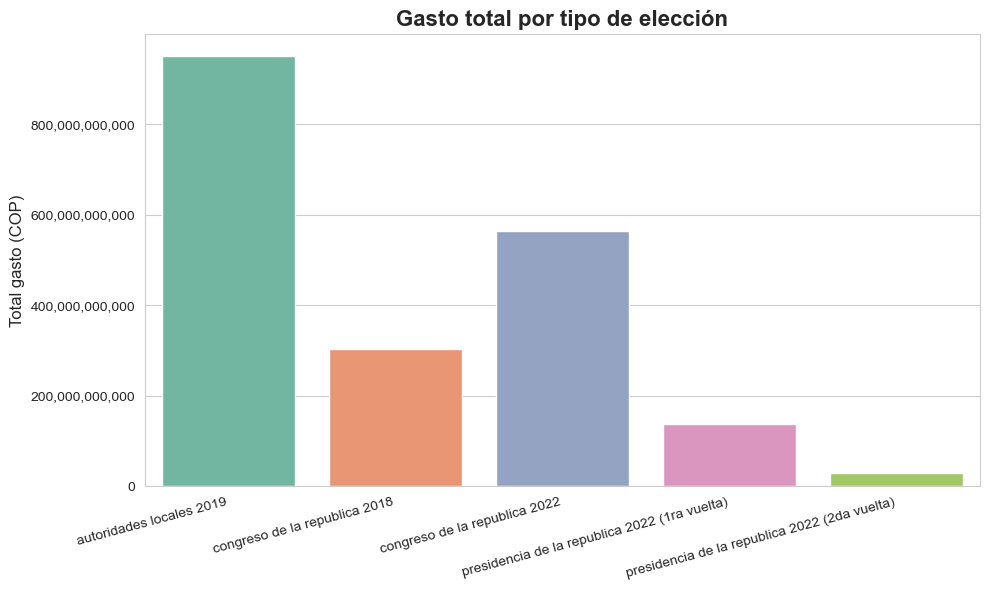

In [12]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=gastos_por_eleccion, x="eleccion", y="ing_valor", hue="eleccion", dodge=False, ax=ax)

ax.set_title("Gasto total por tipo de elección", fontsize=16, fontweight="bold")
ax.set_ylabel("Total gasto (COP)", fontsize=12)
ax.set_xlabel("")

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=15, ha="right")

plt.tight_layout()
plt.show()

In [13]:
top5_por_eleccion = (
    dataset_nuevo.groupby(["eleccion", "partido_politico_normalizado"])["ing_valor"]
    .sum()
    .reset_index()
    .sort_values(["eleccion", "ing_valor"], ascending=[True, False])
    .groupby("eleccion")
    .head(5)
)
top5_por_eleccion.head(100)

,eleccion,partido_politico_normalizado,ing_valor
760,autoridades locales 2019,liberal,"90,138,652,101"
179,autoridades locales 2019,centro democratico,"85,905,575,638"
390,autoridades locales 2019,conservador,"80,947,190,236"
1084,autoridades locales 2019,partido social de unidad nacional,"71,732,049,599"
165,autoridades locales 2019,cambio radical,"66,605,825,662"
1681,congreso de la republica 2018,liberal,"45,928,770,090"
1657,congreso de la republica 2018,centro democratico,"43,859,962,195"
1656,congreso de la republica 2018,cambio radical,"43,833,751,328"
1692,congreso de la republica 2018,partido social de unidad nacional,"38,661,731,582"
1677,congreso de la republica 2018,conservador,"35,358,971,186"


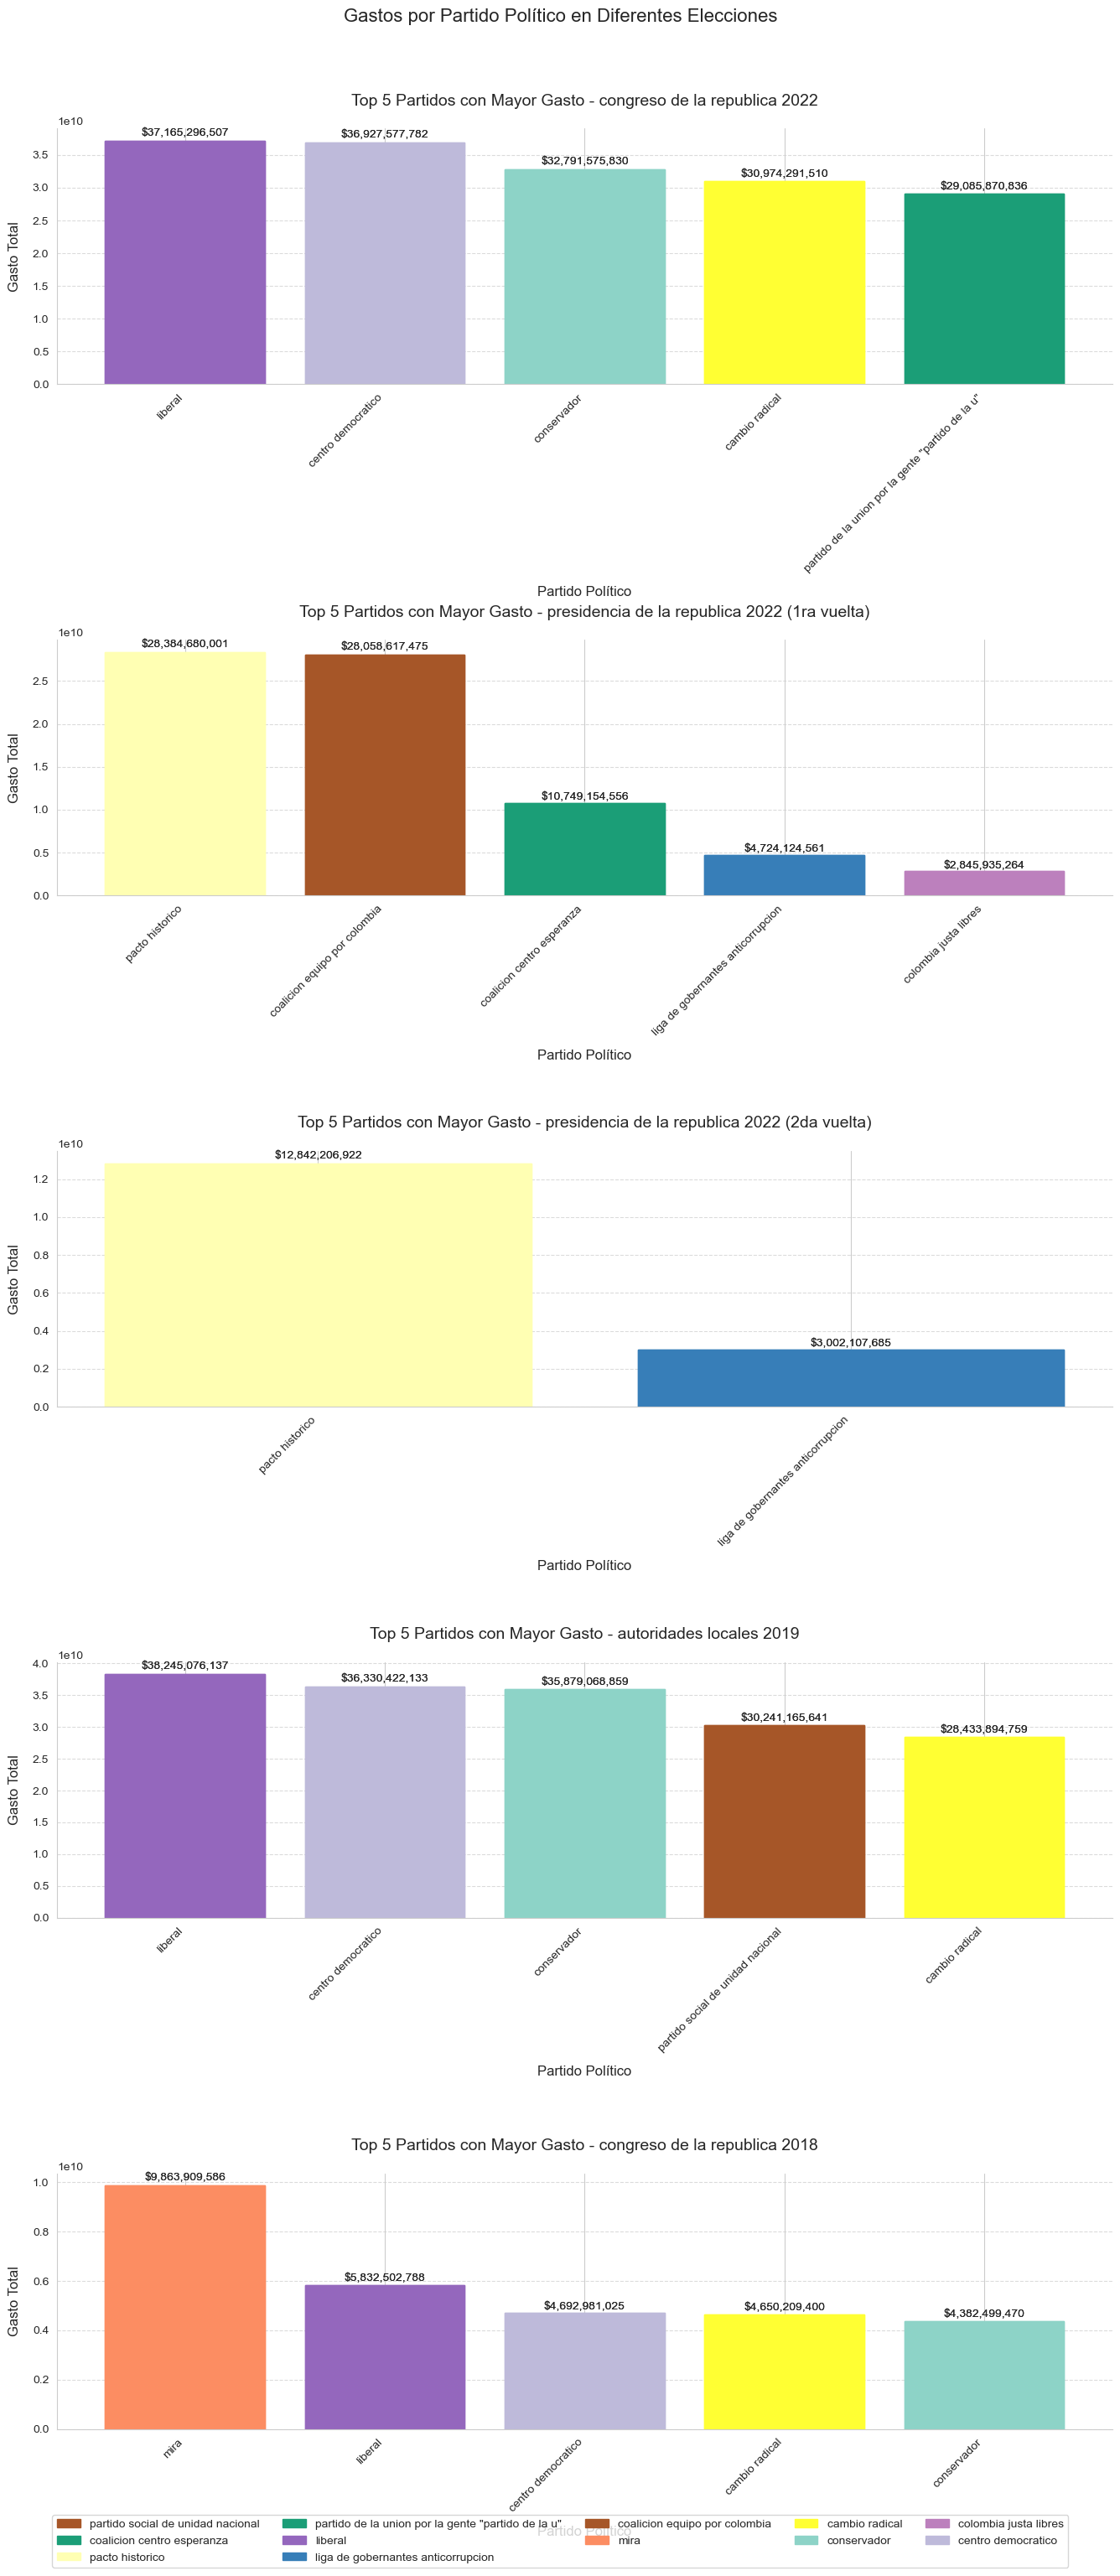

In [14]:
elecciones = top5_por_eleccion["eleccion"].unique()

# Asegurarse que ing_valor sea numérico
dataset_nuevo['ing_valor'] = pd.to_numeric(dataset_nuevo['ing_valor'], errors='coerce')

# Filtrar solo los gastos (si existe la columna ingresos_gastos)
if 'ingresos_gastos' in dataset_nuevo.columns:
    gastos_df = dataset_nuevo[dataset_nuevo['ingresos_gastos'].str.upper().str.contains('GASTO', na=False)]
else:
    # Si no existe la columna, usar todo el dataset
    gastos_df = dataset_nuevo.copy()

# Agrupar por elección y partido, sumar los valores
gastos_por_partido = gastos_df.groupby(['eleccion', 'partido_politico_normalizado'])['ing_valor'].sum().reset_index()

# Obtener elecciones únicas
elecciones = gastos_df['eleccion'].unique()

# Obtener todos los partidos únicos para asignar colores consistentes
todos_partidos = sorted(gastos_df['partido_politico_normalizado'].unique())

# Usar una paleta de colores más diversa
# Combinamos varias paletas para tener más variedad de colores
paleta1 = sns.color_palette("tab10", 10)
paleta2 = sns.color_palette("Set1", 9)
paleta3 = sns.color_palette("Set2", 8)
paleta4 = sns.color_palette("Set3", 12)
paleta5 = sns.color_palette("Dark2", 8)

# Combinar todas las paletas y asegurarse de que hay suficientes colores
paleta_combinada = paleta1 + paleta2 + paleta3 + paleta4 + paleta5
# Asegurarse de que no hay colores repetidos o muy similares
paleta_final = []
for color in paleta_combinada:
    if color not in paleta_final:
        paleta_final.append(color)

# Crear un diccionario de colores para cada partido
colores = {}
for i, partido in enumerate(todos_partidos):
    # Usar módulo para reciclar colores si hay más partidos que colores
    colores[partido] = paleta_final[i % len(paleta_final)]

# Crear subplots para cada elección con más espacio entre ellos
fig, axes = plt.subplots(len(elecciones), 1, figsize=(14, 6*len(elecciones)))

# Si solo hay una elección, convertir axes en lista para mantener consistencia
if len(elecciones) == 1:
    axes = [axes]

# Crear un gráfico para cada elección
for i, eleccion in enumerate(elecciones):
    # Filtrar datos para esta elección
    datos_eleccion = gastos_por_partido[gastos_por_partido['eleccion'] == eleccion]
    
    # Ordenar y tomar los 5 principales
    top5 = datos_eleccion.sort_values('ing_valor', ascending=False).head(5)
    
    # Crear el gráfico manualmente para tener control total sobre los colores
    bars = axes[i].bar(
        top5['partido_politico_normalizado'],
        top5['ing_valor'],
    )
    
    # Asignar colores a las barras según el partido
    for j, bar in enumerate(bars):
        partido = top5.iloc[j]['partido_politico_normalizado']
        bar.set_color(colores[partido])
    
    # Añadir título y etiquetas
    axes[i].set_title(f'Top 5 Partidos con Mayor Gasto - {eleccion}', fontsize=14, pad=20)
    axes[i].set_xlabel('Partido Político', fontsize=12, labelpad=10)
    axes[i].set_ylabel('Gasto Total', fontsize=12, labelpad=10)
    
    # Añadir valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width()/2.,
            height * 1.01,
            f'${height:,.0f}',
            ha='center',
            va='bottom',
            fontsize=10
        )
    
    # Mejorar la apariencia del gráfico
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    
    # Rotar etiquetas del eje x para mejor legibilidad
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

# Ajustar los márgenes y espaciado entre subplots
plt.tight_layout(pad=3.0)  # Aumentar el padding alrededor de cada subplot

# Añadir más espacio entre los subplots
plt.subplots_adjust(hspace=1)  # Aumentar el espacio vertical entre subplots
# AÑADIR ESTA LÍNEA AQUÍ - Inicializar el conjunto para rastrear partidos en gráficos
partidos_en_graficos = set()

# Crear un gráfico para cada elección
for i, eleccion in enumerate(elecciones):
    # Filtrar datos para esta elección
    datos_eleccion = gastos_por_partido[gastos_por_partido['eleccion'] == eleccion]
    
    # Ordenar y tomar los 5 principales
    top5 = datos_eleccion.sort_values('ing_valor', ascending=False).head(5)
    
    partidos_en_graficos.update(top5['partido_politico_normalizado'].tolist())
    
    # Crear el gráfico manualmente para tener control total sobre los colores
    bars = axes[i].bar(
        top5['partido_politico_normalizado'],
        top5['ing_valor'],
    )
    
    # Asignar colores a las barras según el partido
    for j, bar in enumerate(bars):
        partido = top5.iloc[j]['partido_politico_normalizado']
        bar.set_color(colores[partido])
    
    # Añadir título y etiquetas
    axes[i].set_title(f'Top 5 Partidos con Mayor Gasto - {eleccion}', fontsize=14, pad=20)
    axes[i].set_xlabel('Partido Político', fontsize=12, labelpad=10)
    axes[i].set_ylabel('Gasto Total', fontsize=12, labelpad=10)
    
    # Añadir valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width()/2.,
            height * 1.01,
            f'${height:,.0f}',
            ha='center', 
            va='bottom',
            fontsize=10
        )
    
    # Mejorar la apariencia del gráfico
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    
    # Rotar etiquetas del eje x para mejor legibilidad
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')
    
# Crear patches para la leyenda
handles = [mpatches.Patch(color=colores[p], label=p) for p in partidos_en_graficos]

# Añadir leyenda en la parte inferior
fig.legend(handles=handles, loc='lower center', ncol=min(5, len(handles)), 
           bbox_to_anchor=(0.5, 0), fontsize=10)

# Añadir un título general con margen adecuado
fig.suptitle('Gastos por Partido Político en Diferentes Elecciones', 
             fontsize=16, 
             y=1.02)  # Posicionar el título un poco más arriba

# Mostrar el gráfico
plt.show()

<div style="background-color: #e6f2ff; padding: 25px; border-radius: 12px; font-family: 'Segoe UI', sans-serif; color: #333; line-height: 1.6;">

<h2 style="color: #0d47a1;">🧩 <strong>Conclusions — Political Trends in Local and Presidential Elections</strong></h2>

<h3 style="color: #1565c0;">🏙️ Mayoral Elections (2007–2019)</h3>
<ul>
  <li><strong>Right-wing parties</strong> consistently won the most mayoral seats, with over 550 victories in each cycle.</li>
  <li><strong>Center-oriented parties</strong> maintained stable performance, averaging around 480 victories per election.</li>
  <li><strong>Left-wing parties</strong> had limited success, with fewer than 45 mayoral wins per cycle, though they showed slight growth in 2019.</li>
  <li>In terms of total votes, the <strong>Center and Right</strong> dominated, while the <strong>Left</strong> doubled its vote count between 2015 and 2019.</li>
</ul>

<h3 style="color: #1565c0;">🗳️ Presidential Elections (2002–2022)</h3>
<ul>
  <li>In the <strong>first round</strong>, the Right led until 2014, but the <strong>Left overtook it in 2018</strong> and remained dominant in 2022.</li>
  <li>The <strong>Center</strong> surged in 2022, reaching nearly 7 million votes, its highest historical level.</li>
  <li>In the <strong>second round</strong>, the Right dominated until 2018, but in 2022 the Left won with over <strong>11 million votes</strong>, while the Center also gained significant ground.</li>
</ul>

<h3 style="color: #1565c0;">🗺️ Regional Patterns — Presidency 1st Round (2022)</h3>
<ul>
  <li>The map shows a clear <strong>regional divide</strong>:  
    - <strong>Left-wing dominance</strong> in the Pacific, Caribbean, and southern departments.  
    - <strong>Center-oriented victories</strong> in Bogotá, Boyacá, and parts of the Andes.  
    - <strong>Right-wing strength</strong> in Antioquia and northern interior regions.</li>
  <li>Null and blank votes were significant in some departments, but did not dominate in any region.</li>
</ul>

<h3 style="color: #1565c0;">⚠️ About Ideological Classification</h3>
<p>The distribution of parties by political orientation was based on a personal criterion informed by historical patterns of behavior and discourse. While this may not be entirely objective, it reflects the current political reality in Colombia, where individuals and parties often deviate from the ideologies they claim to represent or oppose. This classification responds to the evolving context of each electoral scenario.</p>

<h3 style="color: #1565c0;">🤝 About Coalitions</h3>
<p>The coalition analysis was limited to cases where a <strong>maximum of two political parties</strong> supported a candidate, in order to maintain methodological clarity and avoid excessive dispersion of variables.</p>

<blockquote>These findings reveal a shift in Colombia’s political landscape: while the Right remains strong locally, the Left has gained national momentum, and the Center has emerged as a competitive force in presidential elections. The ideological and financial dynamics of coalitions continue to evolve, reflecting the complexity of Colombia’s multiparty system.</blockquote>
</div>

<div style="background-color: #e6ffe6; padding: 25px; border-radius: 12px; font-family: 'Segoe UI', sans-serif; color: #333; line-height: 1.6;">

<h2 style="color: #0d47a1;">🧩 <strong>Conclusiones — Tendencias Políticas en Elecciones Locales y Presidenciales</strong></h2>

<h3 style="color: #1565c0;">🏙️ Elecciones de Alcaldía (2007–2019)</h3>
<ul>
  <li>Los partidos de <strong>Derecha</strong> ganaron consistentemente la mayor cantidad de alcaldías, con más de 550 por ciclo.</li>
  <li>Los partidos de <strong>Centro</strong> mantuvieron un desempeño estable, con un promedio de 480 alcaldías por elección.</li>
  <li>Los partidos de <strong>Izquierda</strong> tuvieron éxito limitado, con menos de 45 alcaldías por ciclo, aunque mostraron un leve crecimiento en 2019.</li>
  <li>En votos totales, <strong>Centro y Derecha</strong> dominaron, mientras que la <strong>Izquierda</strong> duplicó su votación entre 2015 y 2019.</li>
</ul>

<h3 style="color: #1565c0;">🗳️ Elecciones Presidenciales (2002–2022)</h3>
<ul>
  <li>En la <strong>primera vuelta</strong>, la Derecha lideró hasta 2014, pero la <strong>Izquierda la superó en 2018</strong> y se mantuvo dominante en 2022.</li>
  <li>El <strong>Centro</strong> tuvo un repunte en 2022, alcanzando casi 7 millones de votos, su nivel más alto históricamente.</li>
  <li>En la <strong>segunda vuelta</strong>, la Derecha dominó hasta 2018, pero en 2022 la Izquierda ganó con más de <strong>11 millones de votos</strong>, y el Centro también creció significativamente.</li>
</ul>

<h3 style="color: #1565c0;">🗺️ Patrones Regionales — Presidencia 1ª Vuelta (2022)</h3>
<ul>
  <li>El mapa muestra una clara <strong>división regional</strong>:  
    - <strong>Dominio de la Izquierda</strong> en el Pacífico, Caribe y departamentos del sur.  
    - <strong>Victorias del Centro</strong> en Bogotá, Boyacá y zonas andinas.  
    - <strong>Fortaleza de la Derecha</strong> en Antioquia y regiones del interior norte.</li>
  <li>Los votos nulos y en blanco fueron relevantes en algunos departamentos, pero no dominaron en ninguna región.</li>
</ul>

<h3 style="color: #1565c0;">⚠️ Sobre la Clasificación Ideológica</h3>
<p>La distribución de los partidos por ideologías políticas se hizo en base a un criterio personal y teniendo en cuenta patrones históricos de sus comportamientos y pensamientos. Si bien puede no ser completamente objetiva, se acerca a la realidad actual de Colombia, donde personas y partidos en ocasiones se desvían de la ideología que dicen defender o atacar. Esta clasificación responde al contexto político cambiante en cada escenario electoral.</p>

<h3 style="color: #1565c0;">🤝 Sobre las Coaliciones</h3>
<p>El análisis de coaliciones se limitó a aquellas conformadas por un <strong>máximo de dos partidos políticos</strong> apoyando a un candidato, con el fin de mantener la claridad metodológica y evitar una dispersión excesiva de variables.</p>

<blockquote>Estos hallazgos revelan un cambio en el panorama político colombiano: mientras la Derecha se mantiene fuerte a nivel local, la Izquierda ha ganado impulso nacional, y el Centro emerge como fuerza competitiva en elecciones presidenciales. Las dinámicas ideológicas y financieras de las coaliciones siguen evolucionando, reflejando la complejidad del sistema multipartidista colombiano.</blockquote>
</div>